In [1]:
!pip install libsvmdata

In [2]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
from libsvmdata import fetch_libsvm
X, y = fetch_libsvm("diabetes_scale")

file_sizes: 100%|███████████████████████████| 68.6k/68.6k [00:00<00:00, 179kB/s]


In [4]:
X

array([[-0.294118  ,  0.487437  ,  0.180328  , ...,  0.00149028,
        -0.53117   , -0.0333333 ],
       [-0.882353  , -0.145729  ,  0.0819672 , ..., -0.207153  ,
        -0.766866  , -0.666667  ],
       [-0.0588235 ,  0.839196  ,  0.0491803 , ..., -0.305514  ,
        -0.492741  , -0.633333  ],
       ...,
       [-0.411765  ,  0.21608   ,  0.180328  , ..., -0.219076  ,
        -0.857387  , -0.7       ],
       [-0.882353  ,  0.266332  , -0.0163934 , ..., -0.102832  ,
        -0.768574  , -0.133333  ],
       [-0.882353  , -0.0653266 ,  0.147541  , ..., -0.0938897 ,
        -0.797609  , -0.933333  ]])

In [5]:
X.shape

(768, 8)

In [6]:
y.shape

(768,)

In [7]:
missing_values = np.isnan(X).sum()
print("Number of missing values:", missing_values)

Number of missing values: 0


In [8]:
unique_classes, class_counts = np.unique(y, return_counts=True)
print("Class distribution:", dict(zip(unique_classes, class_counts)))

Class distribution: {-1.0: 268, 1.0: 500}


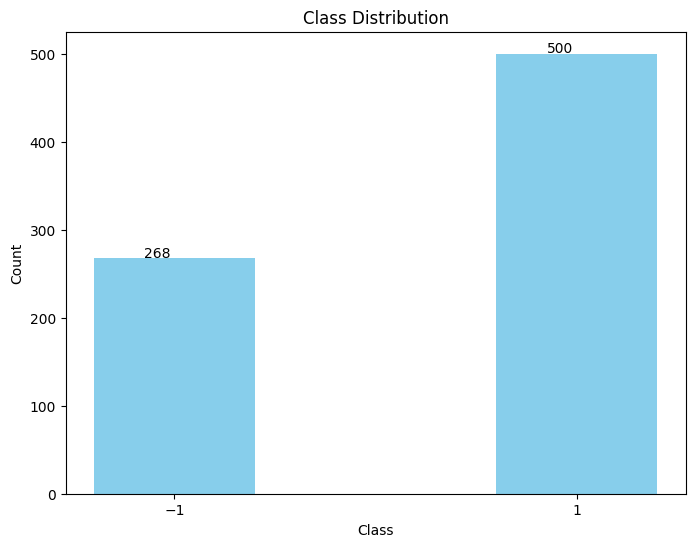

In [9]:
plt.figure(figsize=(8, 6))

plt.bar(unique_classes, class_counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(unique_classes)
bars = plt.bar(unique_classes, class_counts, color='skyblue')
for bar, count in zip(bars, class_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 1, str(count), fontsize=10)


plt.show()

In [10]:
import numpy as np
import pandas as pd
#X = X.toarray()
y_new = y.reshape(-1, 1)

all_data = np.append(X, y_new, axis=1)
var = ['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin', 'BMI', 'Diabetes Pedigree', 'Age', 'Output']
df = pd.DataFrame(all_data, columns=var)
df

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree,Age,Output
0,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333,-1.0
1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667,1.0
2,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333,-1.0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000,1.0
4,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,-1.0
...,...,...,...,...,...,...,...,...,...
763,0.176471,0.015075,0.245902,-0.030303,-0.574468,-0.019374,-0.920581,0.400000,1.0
764,-0.764706,0.226131,0.147541,-0.454545,-1.000000,0.096870,-0.776260,-0.800000,1.0
765,-0.411765,0.216080,0.180328,-0.535354,-0.735225,-0.219076,-0.857387,-0.700000,1.0
766,-0.882353,0.266332,-0.016393,-1.000000,-1.000000,-0.102832,-0.768574,-0.133333,-1.0


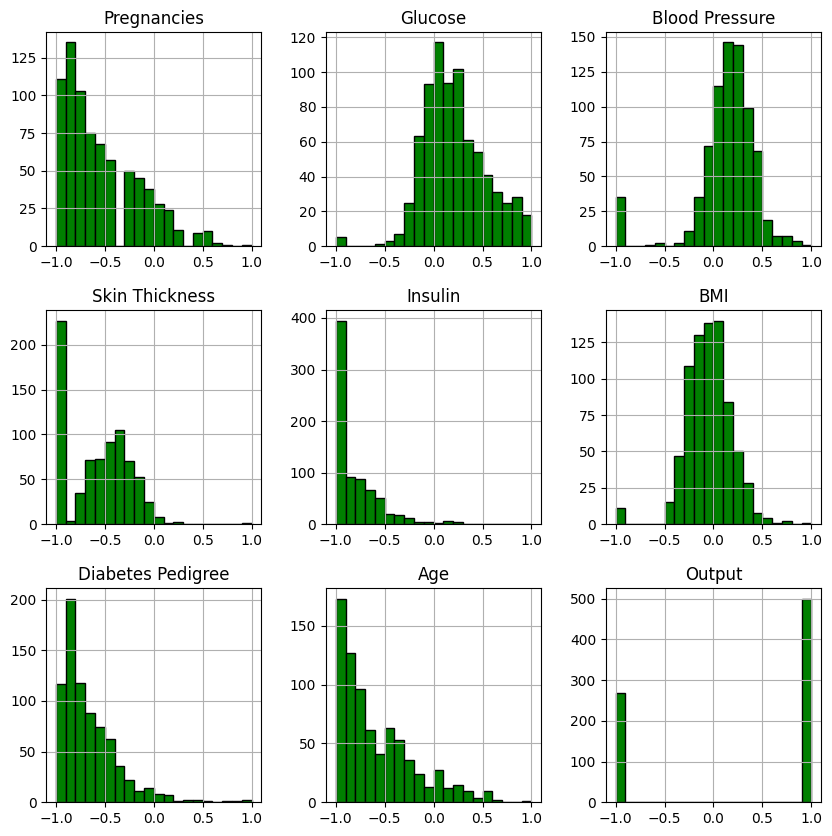

In [11]:
df.hist(figsize = (10,10),bins = 20, color = 'g', edgecolor = 'black');

In [12]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_, y_train, y_ = train_test_split(X,y, test_size = 0.2, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_,y_, test_size = 0.5, random_state = 42)

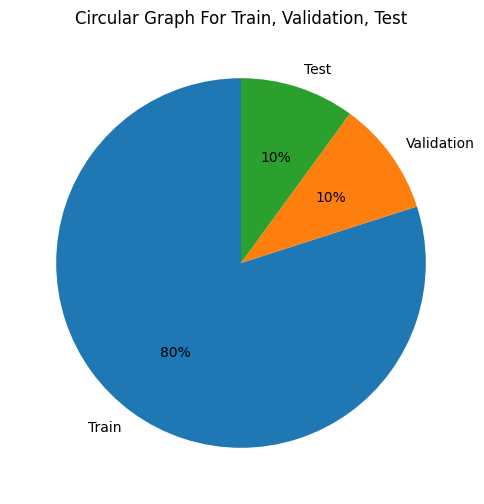

In [13]:
import matplotlib.pyplot as plt

categories = ['Train', 'Validation', 'Test']
values = [round(len(X_train),0), len(X_val), len(X_test)]
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(values, labels=categories, autopct='%1.0f%%', startangle=90)
plt.title('Circular Graph For Train, Validation, Test')
plt.show()

In [14]:
# Perceptron prediction function
def predict_perceptron(x, weights):
    activation = np.dot(weights[1:], x) + weights[0]
    return 1 if activation >= 0 else -1

In [15]:
def score(y_true, predicted_labels):
  accuracy = accuracy_score(y_true, predicted_labels)
  precision = precision_score(y_true, predicted_labels, pos_label=1)
  recall = recall_score(y_true, predicted_labels, pos_label=1)
  f1 = f1_score(y_true, predicted_labels, pos_label=1)
  conf_matrix = confusion_matrix(y_true, predicted_labels)

  print(f"Accuracy: {accuracy}")
  print(f"Precision: {precision}")
  print(f"Recall: {recall}")
  print(f"F1-score: {f1}")
  print(f"Confusion Matrix:\n{conf_matrix}")

##Base Line##

In [16]:
def train_perceptron(X, y, learning_rate= 0.01, max_epochs= 200):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features + 1)  # add one for bias
    accuracies = []

    for _ in range(max_epochs):
        error_count = 0
        for i in range(num_samples):
            prediction = predict_perceptron(X[i], weights)
            update = learning_rate * (y[i] - prediction)
            weights[1:] += update * X[i]
            weights[0] += update
            error_count += int(update != 0)
        y_pred = [predict_perceptron(sample, weights) for sample in X]
        accuracy = accuracy_score(y, y_pred)
        accuracies.append(accuracy)
        if error_count == 0:
            break

    return weights, accuracies

In [17]:
trained_weights, accuracies = train_perceptron(X_train, y_train)
predicted_labels = [predict_perceptron(sample, trained_weights) for sample in X_val]
score(y_val, predicted_labels)

Accuracy: 0.7012987012987013
Precision: 0.9
Recall: 0.574468085106383
F1-score: 0.7012987012987012
Confusion Matrix:
[[27  3]
 [20 27]]


##Using Select Best K##

In [18]:
from sklearn.feature_selection import SelectKBest, f_classif
k_best = SelectKBest(score_func=f_classif, k=5)  # Select the top 2 features
X_train= k_best.fit_transform(X_train, y_train)
X_val = k_best.transform(X_val)
X_test = k_best.transform(X_test)

In [19]:
trained_weights, accuracies = train_perceptron(X_train, y_train)
predicted_labels = [predict_perceptron(sample, trained_weights) for sample in X_val]
score(y_val, predicted_labels)

Accuracy: 0.7662337662337663
Precision: 0.7543859649122807
Recall: 0.9148936170212766
F1-score: 0.8269230769230769
Confusion Matrix:
[[16 14]
 [ 4 43]]


##Search the iterations##

In [20]:
max_epochs_values = [10, 50, 100, 200, 500, 1000]

best_max_epochs = None
best_accuracy = 0.0

for max_epochs in max_epochs_values:
    weights, accuracies = train_perceptron(X_train, y_train, max_epochs=max_epochs)
    y_pred = [predict_perceptron(sample, weights) for sample in X_val]
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Max epoch: {max_epochs}, Accuracy: {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_max_epochs = max_epochs

print(f"Best max_epochs: {best_max_epochs}")
print(f"Best accuracy: {best_accuracy}")

Max epoch: 10, Accuracy: 0.7402597402597403
Max epoch: 50, Accuracy: 0.7922077922077922
Max epoch: 100, Accuracy: 0.7792207792207793
Max epoch: 200, Accuracy: 0.7662337662337663
Max epoch: 500, Accuracy: 0.7402597402597403
Max epoch: 1000, Accuracy: 0.7792207792207793
Best max_epochs: 50
Best accuracy: 0.7922077922077922


##Search learning rate##

In [21]:
learning_rate_values = [0.0001, 0.01, 0.1, 0.5, 1.0]

best_learning_rate = None
best_accuracy = 0.0

for learning_rate in learning_rate_values:

    weights, accuracies = train_perceptron(X_train, y_train, max_epochs= 1000 , learning_rate=learning_rate)
    y_pred = [predict_perceptron(sample, weights) for sample in X_val]
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Learning rate: {learning_rate}, Accuracy: {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_max_epochs = max_epochs
        best_learning_rate = learning_rate

print(f"Best learning_rate: {best_learning_rate}")
print(f"Best accuracy: {best_accuracy}")

Learning rate: 0.0001, Accuracy: 0.7792207792207793
Learning rate: 0.01, Accuracy: 0.7792207792207793
Learning rate: 0.1, Accuracy: 0.7792207792207793
Learning rate: 0.5, Accuracy: 0.7792207792207793
Learning rate: 1.0, Accuracy: 0.7792207792207793
Best learning_rate: 0.0001
Best accuracy: 0.7792207792207793


##FINAL RESULT##

In [22]:
best_learning_rate = 0.1
best_iteration = 1000

trained_weights, accuracies = train_perceptron(X_train, y_train, learning_rate = best_learning_rate, max_epochs = best_iteration)

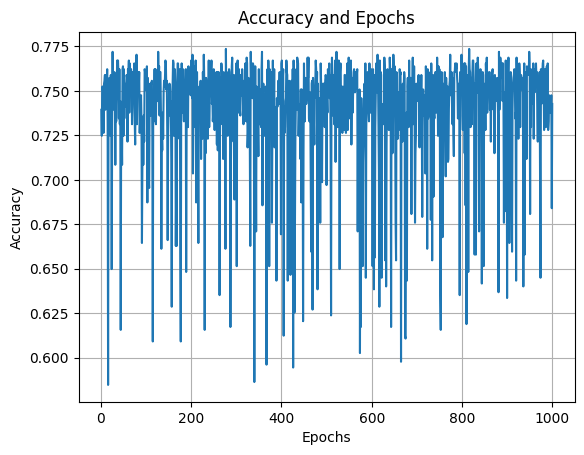

In [23]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(accuracies) + 1), accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy and Epochs')
plt.grid(True)
plt.show()

In [24]:
predicted_labels = [predict_perceptron(sample, trained_weights) for sample in X_val]
score(y_val, predicted_labels)

Accuracy: 0.7792207792207793
Precision: 0.7678571428571429
Recall: 0.9148936170212766
F1-score: 0.8349514563106796
Confusion Matrix:
[[17 13]
 [ 4 43]]


In [25]:
from sklearn.metrics import classification_report

class_report = classification_report(y_val, predicted_labels)
print(class_report)

              precision    recall  f1-score   support

        -1.0       0.81      0.57      0.67        30
         1.0       0.77      0.91      0.83        47

    accuracy                           0.78        77
   macro avg       0.79      0.74      0.75        77
weighted avg       0.78      0.78      0.77        77



##Apply on test set##

In [26]:
predicted_labels = [predict_perceptron(sample, trained_weights) for sample in X_test]
score(y_test, predicted_labels)

Accuracy: 0.8051948051948052
Precision: 0.8135593220338984
Recall: 0.9230769230769231
F1-score: 0.8648648648648649
Confusion Matrix:
[[14 11]
 [ 4 48]]


In [27]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, predicted_labels)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.78      0.56      0.65        25
         1.0       0.81      0.92      0.86        52

    accuracy                           0.81        77
   macro avg       0.80      0.74      0.76        77
weighted avg       0.80      0.81      0.80        77



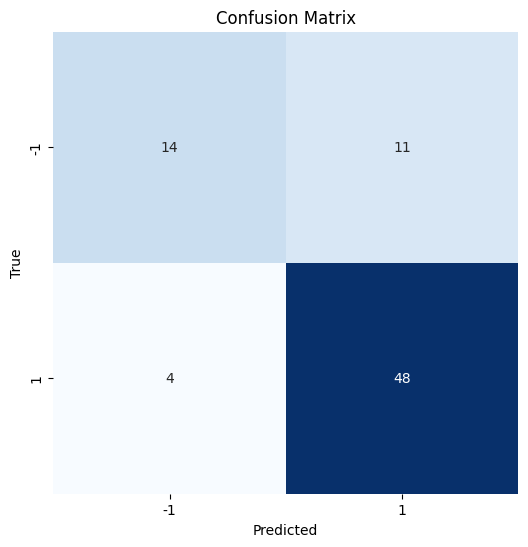

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


confusion = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['-1', '1'],
            yticklabels=['-1', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()